# **Sentiment Analysis With Naive Bayes**

In [21]:
#Read Data
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib                                                         #Joblib is a set of tools to provide lightweight pipelining in Python
from sklearn.feature_extraction.text import CountVectorizer

#Joblib provides a better way to avoid recomputing the same function repetitively saving a lot of time and computational cost. 

In [22]:
data = pd.read_csv('google_play_store_apps_reviews_training.csv')
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [23]:
#Pre-process Data
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)
    
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data
data = preprocess_data(data)

# **Splitting Data**

First, separate the columns into dependent and independent variables (or features and labels). Then we can split those variables into train and test sets.

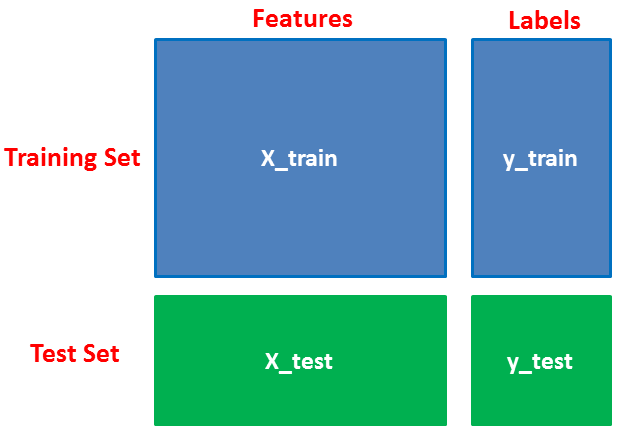

In [24]:
# Split into training and testing data
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [25]:
# Vectorize text reviews to numbers
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [26]:
#Model Generation
from sklearn.naive_bayes import MultinomialNB  

model = MultinomialNB()
model.fit(x, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
model.score(x_test, y_test)

0.8565022421524664

In [29]:
#Check Prediction

model.predict(vec.transform(['Love this app simply awesome!']))

NotFittedError: ignored